In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException  
import requests
import time

from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

import requests
from bs4 import BeautifulSoup


import pandas as pd
import numpy as np
import os
import glob



In [2]:
driver.get('https://www.bjjheroes.com/a-z-bjj-fighters-list')

In [3]:

URL = "https://www.bjjheroes.com/a-z-bjj-fighters-list"
page = requests.get(URL)

print(page.text)

<!doctype html>
<head dir="ltr" lang="en-US" prefix="og: https://ogp.me/ns#">

<meta charset="UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<link href="//www.google-analytics.com" rel="dns-prefetch">
<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes" />
<link rel="pingback" href="https://www.bjjheroes.com/xmlrpc.php">
<link rel='icon' id='favicon' type='image/png' href='https://www.bjjheroes.com/wp-content/uploads/2020/03/favicon-16x16-1.png'><link rel='apple-touch-icon' href='https://www.bjjheroes.com/wp-content/uploads/2020/03/apple-icon-144x144-1.png'><link rel='apple-touch-icon' sizes='76x76' href='https://www.bjjheroes.com/wp-content/uploads/2020/03/apple-icon-76x76-1.png'><link rel='apple-touch-icon' sizes='114x114' href='https://www.bjjheroes.com/wp-content/uploads/2020/03/apple-icon-114x114-1.png'><link rel='apple-touch-icon' sizes='144x144' href='https://www.bjjheroes.com/wp-content/uploads/2020/03/apple-icon-144x1

In [4]:
time.sleep(10)

In [5]:
table_path = '/html/body/div[1]/div[1]/div/div[4]/div/div/div[2]/div[1]/div/article/div/div[2]/div[5]/div/table/thead/tr/th[2]'


In [6]:
driver.find_element('xpath', '/html/body/div[3]/div/div/div/div/div[3]/div/div/div[1]/div[1]/span').click()

In [7]:
links = []
for i in range (1,1271,1):
    links.append('/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr['+str(i)+']/td[1]/a')
links[0]


'/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr[1]/td[1]/a'

In [8]:
firstname = []
for i in range (0, len(links), 1):
    y = driver.find_element('xpath',links[i]).text
    firstname.append(y)

surname = []
for i in range (1, 1271, 1):
    s = driver.find_element('xpath','/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr['+str(i)+']/td[2]/a').text
    surname.append(s)

lst = ['{} '.format(elem) for elem in firstname]
fullname = list(map(str.__add__, lst, surname))

name_dictionary = zip(fullname, links)
name_dictionary = dict(name_dictionary)
name_dictionary

{'Aarae Alexander': '/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr[1]/td[1]/a',
 'Aaron Johnson': '/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr[2]/td[1]/a',
 'Abdurakhman Bilarov': '/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr[3]/td[1]/a',
 'Abmar Barbosa': '/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr[4]/td[1]/a',
 'Abraham Marte Messina': '/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr[5]/td[1]/a',
 'Adam Benayoun': '/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr[6]/td[1]/a',
 'Adam Ferrara': '/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr[7]/td[1]/a',
 'Adam Kayoom': '/html/body/div[2]/div[1]/div/div[4]/div/div/div/div[1]/div/article/div/table/tbody/tr[8]/td[1]/a',
 'Adam Wardzinski': '/html/body/div[2]/div[

In [9]:
def check_exists_by_xpath(xpath):
    try:
        driver.find_element('xpath',table_path)
    except NoSuchElementException:
        return False
    return True

In [10]:
def check(fighter, driver, name_dictionary, table_path):
    if fighter in name_dictionary:
        driver.find_element('xpath', name_dictionary[fighter]).click()
        time.sleep(3)
        url = driver.current_url
        page = requests.get(url)
        soup = BeautifulSoup(page.text)

        if check_exists_by_xpath(table_path, driver):
            data = []
            table = soup.find('table')
            table_body = table.find('tbody')

            rows = table_body.find_all('tr')
            for row in rows:
                g = row.find_all('td')

                stats = {
                    'Opponent': g[1].text,
                    'WL': g[2].text,
                    'Method': g[3].text,
                    'Competition': g[4].text,
                    'Weight': g[5].text,
                    'Stage': g[6].text,
                    'Year': g[7].text
                }

                data.append(stats)
            df = pd.DataFrame(data)
            name = driver.find_element('xpath', '/html/body/div[1]/div[1]/div/div[4]/div/div/div[1]/div/div/div[2]/div/div/div/h1').text
            csv_name = f"{name}.csv"
            df.to_csv(csv_name)

        else:
            print('No table available')
        print("Success")
    else:
        print("fighter not available")
    return fighter

In [11]:
fighter = input("Choose your fighter")
check(fighter)

Choose your fighterAndre Galvao
Success


'Andre Galvao'

In [12]:

def run_data_clean():
    i = 0
    while i < 2:
        answer = input("Do you wish to run data cleaner? (yes or no))")
        if any(answer.lower() == f for f in ["yes", 'y', '1', 'ye']):
            
            path = 'C:/Users/IkramChoudhury/madeon finale'
            extension = 'csv'
            os.chdir(path)
            result = glob.glob('*.{}'.format(extension))
            result[0]
            df = pd.read_csv(result[0])
            df = df.drop('Unnamed: 0', axis=True)
            df = df[df["WL"].str.contains("D") == False]
            df.dropna(axis=0, inplace=True)
            df["Weight"] = df["Weight"].str.replace("O","")
            df["Weight"] = df["Weight"].str.replace("U","")   
            return df
        
        elif any(answer.lower() == f for f in ['no', 'n', '0']):
            print("No")
            break
        else:
            i += 1
            if i < 2:
                print('Please enter yes or no')
            else:
                print("Nothing done")
    return 



In [13]:
df = run_data_clean()

Do you wish to run data cleaner? (yes or no))yes


In [14]:
df

,Opponent,WL,Method,Competition,Weight,Stage,Year
0,Gustavo CamposGustavo Campos,L,Referee Decision,World Cup,82KG,F,2005
1,Marcelo GarciaMarcelo Garcia,L,Pts: 2x0,World Champ.,82KG,F,2006
2,Marcelo GarciaMarcelo Garcia,L,Pts: 8x2,Brasileiro,82KG,F,2006
3,Marcelo GarciaMarcelo Garcia,L,Choke from back,Brasileiro,ABS,SF,2006
4,Murilo SantanaMurilo Santana,L,Pts: 4x0,Paulista FPJJ,82KG,F,2007
...,...,...,...,...,...,...,...
180,Patrick GaudioPatrick Gaudio,W,Referee Decision,World Champ.,88KG,F,2017
181,Alexandre RibeiroAlexandre Ribeiro,W,"Pts: 0x0, Adv",IBJJF Pro GP,ABS,4F,2017
182,Claudio CalasansClaudio Calasans,W,Pts: 14x0,ADCC,ABS,SPF,2017
183,Jaime CanutoJaime Canuto,W,"Pts: 0x0, Adv",King of Mats,85KG,RR,2018


In [15]:
def output_to_csv():
    i = 0
    while i < 2:
        answer = input("Ouput to csv? (yes or no)")
        if any(answer.lower() == f for f in ["yes", 'y', '1', 'ye']):
            
            path = 'C:/Users/IkramChoudhury/madeon finale'
            extension = 'csv'
            os.chdir(path)
            result = glob.glob('*.{}'.format(extension))
            new_name = result[0]
            
            csv_name = f"cleaned {new_name}"
            csv_name
            df.to_csv(csv_name)
            break
        elif any(answer.lower() == f for f in ['no', 'n', '0']):
            print("No")
            break
        else:
            i += 1
            if i < 2:
                print('Please enter yes or no')
            else:
                print("Nothing done")




In [16]:
output_to_csv()

Ouput to csv? (yes or no)no
No


In [17]:
def get_submission_analysis():
    i = 0
    while i < 2:
        answer = input("get_submission_analysis? (yes or no)")
        if any(answer.lower() == f for f in ["yes", 'y', '1', 'ye']):
            from sklearn.preprocessing import LabelEncoder
            le = LabelEncoder()
            le.fit(df['Method'])
            df_enc = df.copy()
            df_enc['Method'] = le.transform(df['Method'])
            ids = le.fit_transform(df['Method'])
            method_encoded_dictionary = dict(zip(le.classes_, range(len(le.classes_))))
            method_encoded_dictionary = dict((v,k) for k,v in method_encoded_dictionary.items())
            le.fit(df['Competition'])
            df_enc['Competition'] = le.transform(df['Competition'])
            ids = le.fit_transform(df['Competition'])
            Competition_encoded_dictionary = dict(zip(le.classes_, range(len(le.classes_))))
            Competition_encoded_dictionary = dict((v,k) for k,v in Competition_encoded_dictionary.items())


            le.fit(df['Weight'])
            df_enc['Weight'] = le.transform(df['Weight'])
            ids = le.fit_transform(df['Weight'])
            Weight_encoded_dictionary = dict(zip(le.classes_, range(len(le.classes_))))
            Weight_encoded_dictionary = dict((v,k) for k,v in Weight_encoded_dictionary.items())

            le.fit(df['Stage'])
            df_enc['Stage'] = le.transform(df['Stage'])
            ids = le.fit_transform(df['Stage'])
            Stage_encoded_dictionary = dict(zip(le.classes_, range(len(le.classes_))))
            Stage_encoded_dictionary = dict((v,k) for k,v in Stage_encoded_dictionary.items())

            le.fit(df['Opponent'])
            df_enc['Opponent'] = le.transform(df['Opponent'])
            ids = le.fit_transform(df['Opponent'])
            Opponent_encoded_dictionary = dict(zip(le.classes_, range(len(le.classes_))))
            Opponent_encoded_dictionary = dict((v,k) for k,v in Opponent_encoded_dictionary.items())

            df_enc_win = df_enc.copy()
            df_enc_win['WL'] = df_enc['WL'].replace(['L','W'],[0,1])


            x =df_enc_win[df_enc_win['WL']==1]['Method'].value_counts()
            #Most_common_way_of_winning = method_encoded_dictionary[x]
            x = pd.Series(x).array

            Best_submissions_ranked = []

            for i in range (0,len(x),1):
                y = method_encoded_dictionary[x[i]]
                Best_submissions_ranked.append(y)


            x =df_enc_win[df_enc_win['WL']==0]['Method'].value_counts()
            #Most_common_way_of_winning = method_encoded_dictionary[x]
            x = pd.Series(x).array

            most_common_submission_caught_in = []

            for i in range (0,len(x),1):
                y = method_encoded_dictionary[x[i]]
                most_common_submission_caught_in.append(y)

            print(most_common_submission_caught_in)
            
            
            
            
        elif any(answer.lower() == f for f in ['no', 'n', '0']):
            print("No")
            break
        else:
            i += 1
            if i < 2:
                print('Please enter yes or no')
            else:
                print("Nothing done")
    return Best_submissions_ranked, most_common_submission_caught_in
            
            



In [18]:
gx = get_submission_analysis()
Best_submissions_ranked, most_common_submission_caught_in = gx
Best_submissions_ranked = list(dict.fromkeys(Best_submissions_ranked))
most_common_submission_caught_in = list(dict.fromkeys(most_common_submission_caught_in))
print (f"{fighter}'s most effective submissions are {Best_submissions_ranked}")
#print (f"{fighter}'s most effective submissions are {most_common_submission_caught_in}")


get_submission_analysis? (yes or no)yes
['Brabo choke', 'Bow and arrow', 'Bow and arrow', 'Armbar', 'Armbar', 'Armbar', 'Arm in Ezekiel', 'Arm in Ezekiel', 'Arm in Ezekiel', 'Arm in Ezekiel', 'Arm in Ezekiel', 'Arm in Ezekiel', 'Arm in Ezekiel', 'Arm in Ezekiel', 'Arm in Ezekiel', 'Arm in Ezekiel', 'Arm in Ezekiel']
Andre Galvao's most effective submissions are ['North south choke', 'Kimura', 'Inverted triangle', 'Inverted armbar', 'Heel hook', 'Choke from back', 'Choke', 'Brabo choke', 'Bow and arrow', 'Armbar', 'Arm in Ezekiel']


In [19]:
# Choose what variable to run classification ML models for:
# Opponent
# Method
# Competition
# Weight
# Stage


variable = input('choose your destiny')

choose your destinyMethod


In [20]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Method'])
df_enc = df.copy()
df_enc['Method'] = le.transform(df['Method'])
ids = le.fit_transform(df['Method'])
method_encoded_dictionary = dict(zip(le.classes_, range(len(le.classes_))))
method_encoded_dictionary = dict((v,k) for k,v in method_encoded_dictionary.items())
le.fit(df['Competition'])
df_enc['Competition'] = le.transform(df['Competition'])
ids = le.fit_transform(df['Competition'])
Competition_encoded_dictionary = dict(zip(le.classes_, range(len(le.classes_))))
Competition_encoded_dictionary = dict((v,k) for k,v in Competition_encoded_dictionary.items())


le.fit(df['Weight'])
df_enc['Weight'] = le.transform(df['Weight'])
ids = le.fit_transform(df['Weight'])
Weight_encoded_dictionary = dict(zip(le.classes_, range(len(le.classes_))))
Weight_encoded_dictionary = dict((v,k) for k,v in Weight_encoded_dictionary.items())

le.fit(df['Stage'])
df_enc['Stage'] = le.transform(df['Stage'])
ids = le.fit_transform(df['Stage'])
Stage_encoded_dictionary = dict(zip(le.classes_, range(len(le.classes_))))
Stage_encoded_dictionary = dict((v,k) for k,v in Stage_encoded_dictionary.items())

le.fit(df['Opponent'])
df_enc['Opponent'] = le.transform(df['Opponent'])
ids = le.fit_transform(df['Opponent'])
Opponent_encoded_dictionary = dict(zip(le.classes_, range(len(le.classes_))))
Opponent_encoded_dictionary = dict((v,k) for k,v in Opponent_encoded_dictionary.items())

df_enc_win = df_enc.copy()
df_enc_win['WL'] = df_enc['WL'].replace(['L','W'],[0,1])






X = df_enc_win[f'{variable}'].values
y = df_enc_win['WL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

(array([20., 20.,  8., 22.,  7., 17., 15.,  6., 24.,  5.]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <BarContainer object of 10 artists>)

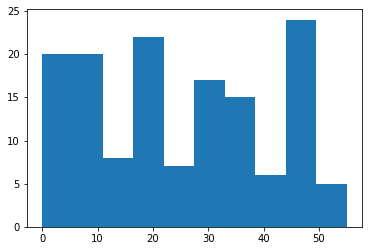

In [22]:
plt.hist(X_train)

In [23]:
scalar = StandardScaler()

(array([20., 20.,  8., 22.,  7., 17., 15.,  6., 24.,  5.]),
 array([-1.52910045, -1.19269835, -0.85629625, -0.51989415, -0.18349205,
         0.15291005,  0.48931214,  0.82571424,  1.16211634,  1.49851844,
         1.83492054]),
 <BarContainer object of 10 artists>)

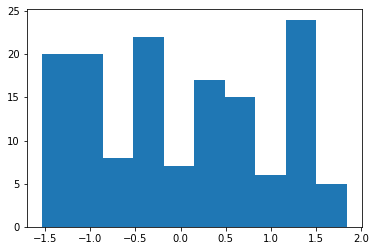

In [24]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

plt.hist(X_train)

In [25]:
## Optimal KNN

error_rate = []

for i in range (1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

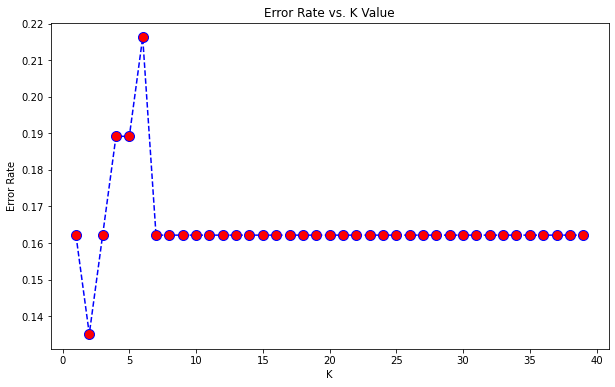

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
K_val = error_rate.index(min(error_rate))
classifier = KNeighborsClassifier(n_neighbors=K_val, p=2, metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
KNN_f1 = f1_score(y_test, y_pred)
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
KNN_score = metrics.accuracy_score(pred,y_test)

In [28]:
model_svm_rad=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model_svm_rad.fit(X_train,y_train)
prediction1=model_svm_rad.predict(X_test)
SVM_radial_f1 = f1_score(y_test, prediction1)

In [29]:
model_svm_lin=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model_svm_lin.fit(X_train,y_train)
prediction2=model_svm_lin.predict(X_test)
#print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,y_test))
SVM_linear_f1 = f1_score(y_test, prediction2)

In [30]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
prediction3=model_log.predict(X_test)
#print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))
logisitic_reg_f1 = f1_score(y_test, prediction3)

In [31]:
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
prediction4=model_DT.predict(X_test)
#print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))
decision_tree_f1 = f1_score(y_test, prediction4)

In [32]:
model_GNB=GaussianNB()
model_GNB.fit(X_train,y_train)
prediction6=model_GNB.predict(X_test)
Gaussian_NB_f1 = f1_score(y_test, prediction6)

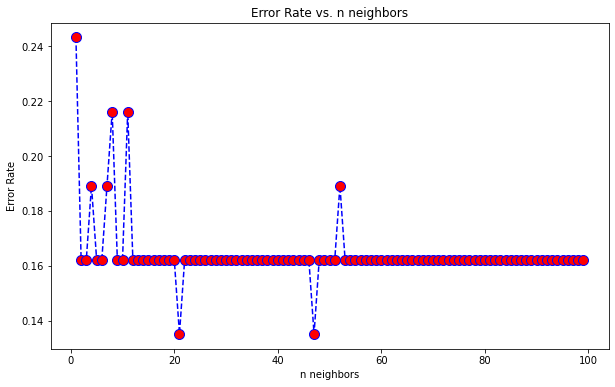

In [33]:
error_rate = []

for i in range (1,100):
    
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100,1),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n neighbors')
plt.xlabel('n neighbors')
plt.ylabel('Error Rate')
n_estimator_optimal = error_rate.index(min(error_rate))
np.asarray(n_estimator_optimal)
n_estimator_optimal
model_RF=RandomForestClassifier(n_estimators=n_estimator_optimal)
model_RF.fit(X_train,y_train)
prediction7=model.predict(X_test)
#print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,y_test))
Random_forest_f1 = f1_score(y_test, prediction7)


In [34]:
n_estimator_optimal

20

In [35]:
classifier_f1_dictionary = {'KNN':KNN_f1, 'Radial_SVM':SVM_radial_f1, 'Linear_SVM':SVM_linear_f1, 'Logistic_regression':logisitic_reg_f1, 'Decision_tree':decision_tree_f1, 'Gaussian_Naive_Bayes':Gaussian_NB_f1, 'Random_forest':Random_forest_f1} 
classifier_f1_dictionary
identifier = max(classifier_f1_dictionary, key=classifier_f1_dictionary.get)
print(f"{identifier} was the best classification model for this scenario")



Radial_SVM was the best classification model for this scenario


In [36]:
# Opponent
# Method
# Competition
# Weight
# Stage

what_to_predict = input('Choose your move')

Choose your moveBrabo choke


In [37]:



method_encoded_dictionary_x = {value:key for key, value in method_encoded_dictionary.items()}
Opponent_encoded_dictionary_x = {value:key for key, value in Opponent_encoded_dictionary.items()}
Competition_encoded_dictionary_x = {value:key for key, value in Competition_encoded_dictionary.items()}
Weight_encoded_dictionary_x = {value:key for key, value in Weight_encoded_dictionary.items()}
Stage_encoded_dictionary_x = {value:key for key, value in Stage_encoded_dictionary.items()} 


if variable == 'Method':
    X_test = method_encoded_dictionary_x[what_to_predict]
elif variable == 'Opponent':
    X_test = Opponent_encoded_dictionary_x[what_to_predict]
elif variable == 'Competition':
    X_test = Competition_encoded_dictionary_x[what_to_predict]
elif variable == 'Weight':
    X_test = Weight_encoded_dictionary_x[what_to_predict]
elif variable == 'Stage':
    X_test = Stage_encoded_dictionary_x[what_to_predict]

    
    
    


In [38]:
X_test = np.asarray(X_test).reshape(-1,1)

if identifier == 'KNN':
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    if y_pred == 0:
        print(f'{identifier} found that {fighter} had failed')
    elif y_pred == 1:
        print(f'{identifier} found that {fighter} had success')
    


elif identifier == 'Radial_SVM':
        model_svm_rad.fit(X_train,y_train)
        prediction1=model_svm_rad.predict(X_test)
        
        if prediction1 == 0:
                print(f'{identifier} found that {fighter} had failed')
        elif prediction1 == 1:
                print(f'{identifier} found that {fighter} had success')
        

elif identifier == 'Linear_SVM':
    model_svm_lin.fit(X_train,y_train)
    prediction2=model_svm_lin.predict(X_test)
    
    if prediction2 == 0:
        print(f'{identifier} found that {fighter} had failed')
    elif prediction2 == 1:
        print(f'{identifier} found that {fighter} had success')
    
    
elif identifier == 'Logistic_regression':
    model_log.fit(X_train,y_train)
    prediction3=model_log.predict(X_test)
    
    if prediction3 == 0:
        print(f'{identifier} found that {fighter} had failed')
    elif prediction3 == 1:
        print(f'{identifier} found that {fighter} had success')
    


elif identifier == 'Decision_tree':
    model_DT.fit(X_train,y_train)
    prediction4=model_DT.predict(X_test)
    
    if prediction4 == 0:
        print(f'{identifier} found that {fighter} had failed')
    elif prediction4 == 1:
        print(f'{identifier} found that {fighter} had success')

elif identifier == 'Gaussian_Naive_Bayes':
    model_GNB.fit(X_train,y_train)
    prediction6=model_GNB.predict(X_test)
    if prediction6 == 0:
        print(f'{identifier} found that {fighter} had failed')
    elif prediction6 == 1:
        print(f'{identifier} found that {fighter} had success')


elif identifier == 'Random_forest':
    model_RF.fit(X_train,y_train)
    prediction7=model.predict(X_test)
    if prediction7 == 0:
        print(f'{identifier} found that {fighter} had failed')
    elif prediction7 == 1:
        print(f'{identifier} found that {fighter} had success')


Radial_SVM found that Andre Galvao had success
